## Exercise 2 - Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces a scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). A linear regression model learned from the data *without* the protected characteristic (gender) should have slope close to 100.0

Now edit the code to simulate the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45) ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios. Explain this observation using the causal models on pp. 48-50 of the slides of Lecture 8.

In [81]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [109]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

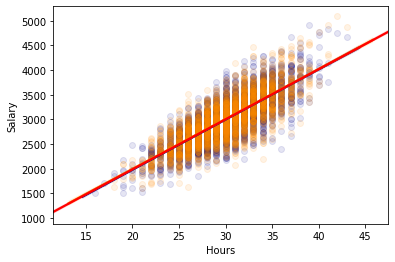

In [110]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.1})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.1})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

## Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [111]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_)

slope: 101.5


In [112]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})


In [113]:
# a) Women earn 200 less
for index, row in data.iterrows():
    if (row['Gender']==1):
        data.at[index, 'Salary']=row['Salary']-200

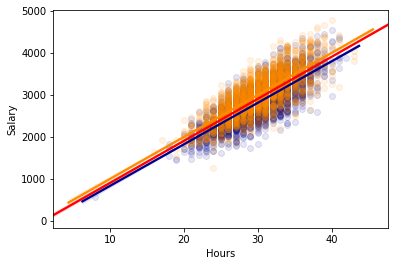

In [114]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.1})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.1})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

In [115]:
hrs = data['Hours'].values
sal = data["Salary"].values

In [116]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_)

slope: 100.3


In [117]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

In [118]:
# b) distribution of work hours are different
hrs
for index, row in data.iterrows():
    hrs = None
    if (row['Gender']==1):
        hrs = np.random.binomial(60, 0.45)
    else :
        hrs = np.random.binomial(60,0.55)
    
    data.at[index, 'Hours']=hrs
    data.at[index,'Salary']= hrs * np.random.normal(100,10)
        


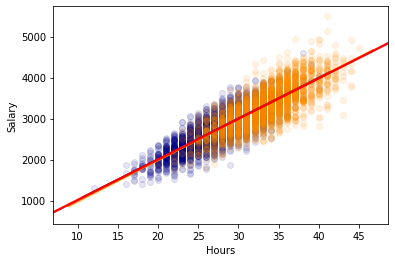

In [119]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.1})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.1})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

In [120]:
hrs = data['Hours'].values
sal = data["Salary"].values

reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_)

slope: 99.1


In [121]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

In [122]:
# c) both
for index, row in data.iterrows():
    hrs = None
    if (row['Gender']==1):
        hrs = np.random.binomial(60, 0.45)
        data.at[index, 'Hours']=hrs
        data.at[index,'Salary']= (hrs * np.random.normal(100,10))-200
    else :
        hrs = np.random.binomial(60,0.55)
        data.at[index, 'Hours']=hrs
        data.at[index,'Salary']= (hrs * np.random.normal(100,10))


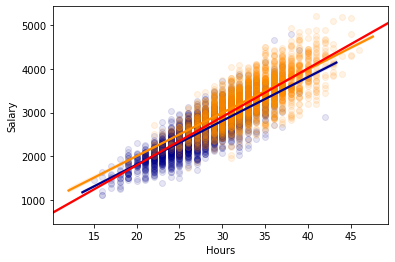

In [123]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.1})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.1})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

In [124]:
hrs = data['Hours'].values
sal = data["Salary"].values

reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_)

slope: 110.6


salary = ((WorkHours * Gender) * HourWage)+ Gender

Lower base salary, lower working hours for women. This means women will have lower salaries in general. Slope is different because the model discriminates women and there's a disparity in the dataset. This could be used as an input to a model that tries to correct the wage gap.

The model where womens salary is 200 less, still has wages as kind of a mirror image of each other, and therefore the slope is not changed. Same thing is with the different working hours only model. In the last model womens salaries are lower in the salary range, and also lower on the hour range so the slope is altered.